<a href="https://www.kaggle.com/code/sefaberkacar/rating-product-sorting-reviews-in-amazon?scriptVersionId=165788832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Problem

Correctly calculating the points awarded to products after sales is a crucial issue in e-commerce. Solving this problem leads to increased customer satisfaction, improved product visibility for sellers, and a seamless shopping experience for buyers. Additionally, ensuring the accurate ordering of product comments is another important challenge. Misleading comments can directly impact product sales, resulting in financial and customer losses. E-commerce sites and sellers can increase sales and ensure a smooth purchasing journey for customers by addressing these issues.

# Dataset

* This dataset contains Amazon product data, including product categories and metadata.
* The electronics category's most reviewed product has user ratings and reviews.

# Variables

* reviewerID: User ID
* asin: Product ID
* reviewerName: User Name
* helpful: Useful evaluation rating
* reviewText: Review
* overall: Product rating
* summary: Evaluation summary
* unixReviewTime: Review time
* reviewTime: Review time Raw
* day_diff: Number of days since evaluation
* helpful_yes: Number of times the evaluation was found helpful
* total_vote: Number of votes for the evaluation

# Average Rating and Time-Based Weighted Average

In [1]:
import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)

df = pd.read_csv("/kaggle/input/amazon-reviews/amazon_reviews.csv")
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.00000,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.00000,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.00000,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.00000,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.00000,works great,1381449600,2013-11-10,393,0,0


# Average Rating

In [2]:
# Average Rating
df["overall"].mean()

4.587589013224822

# Time-Based Weighted Average

To determine the appropriate time intervals for using Time-Based Weighted Average in our data set, it is helpful to analyze the monthly scores and their corresponding graphs.

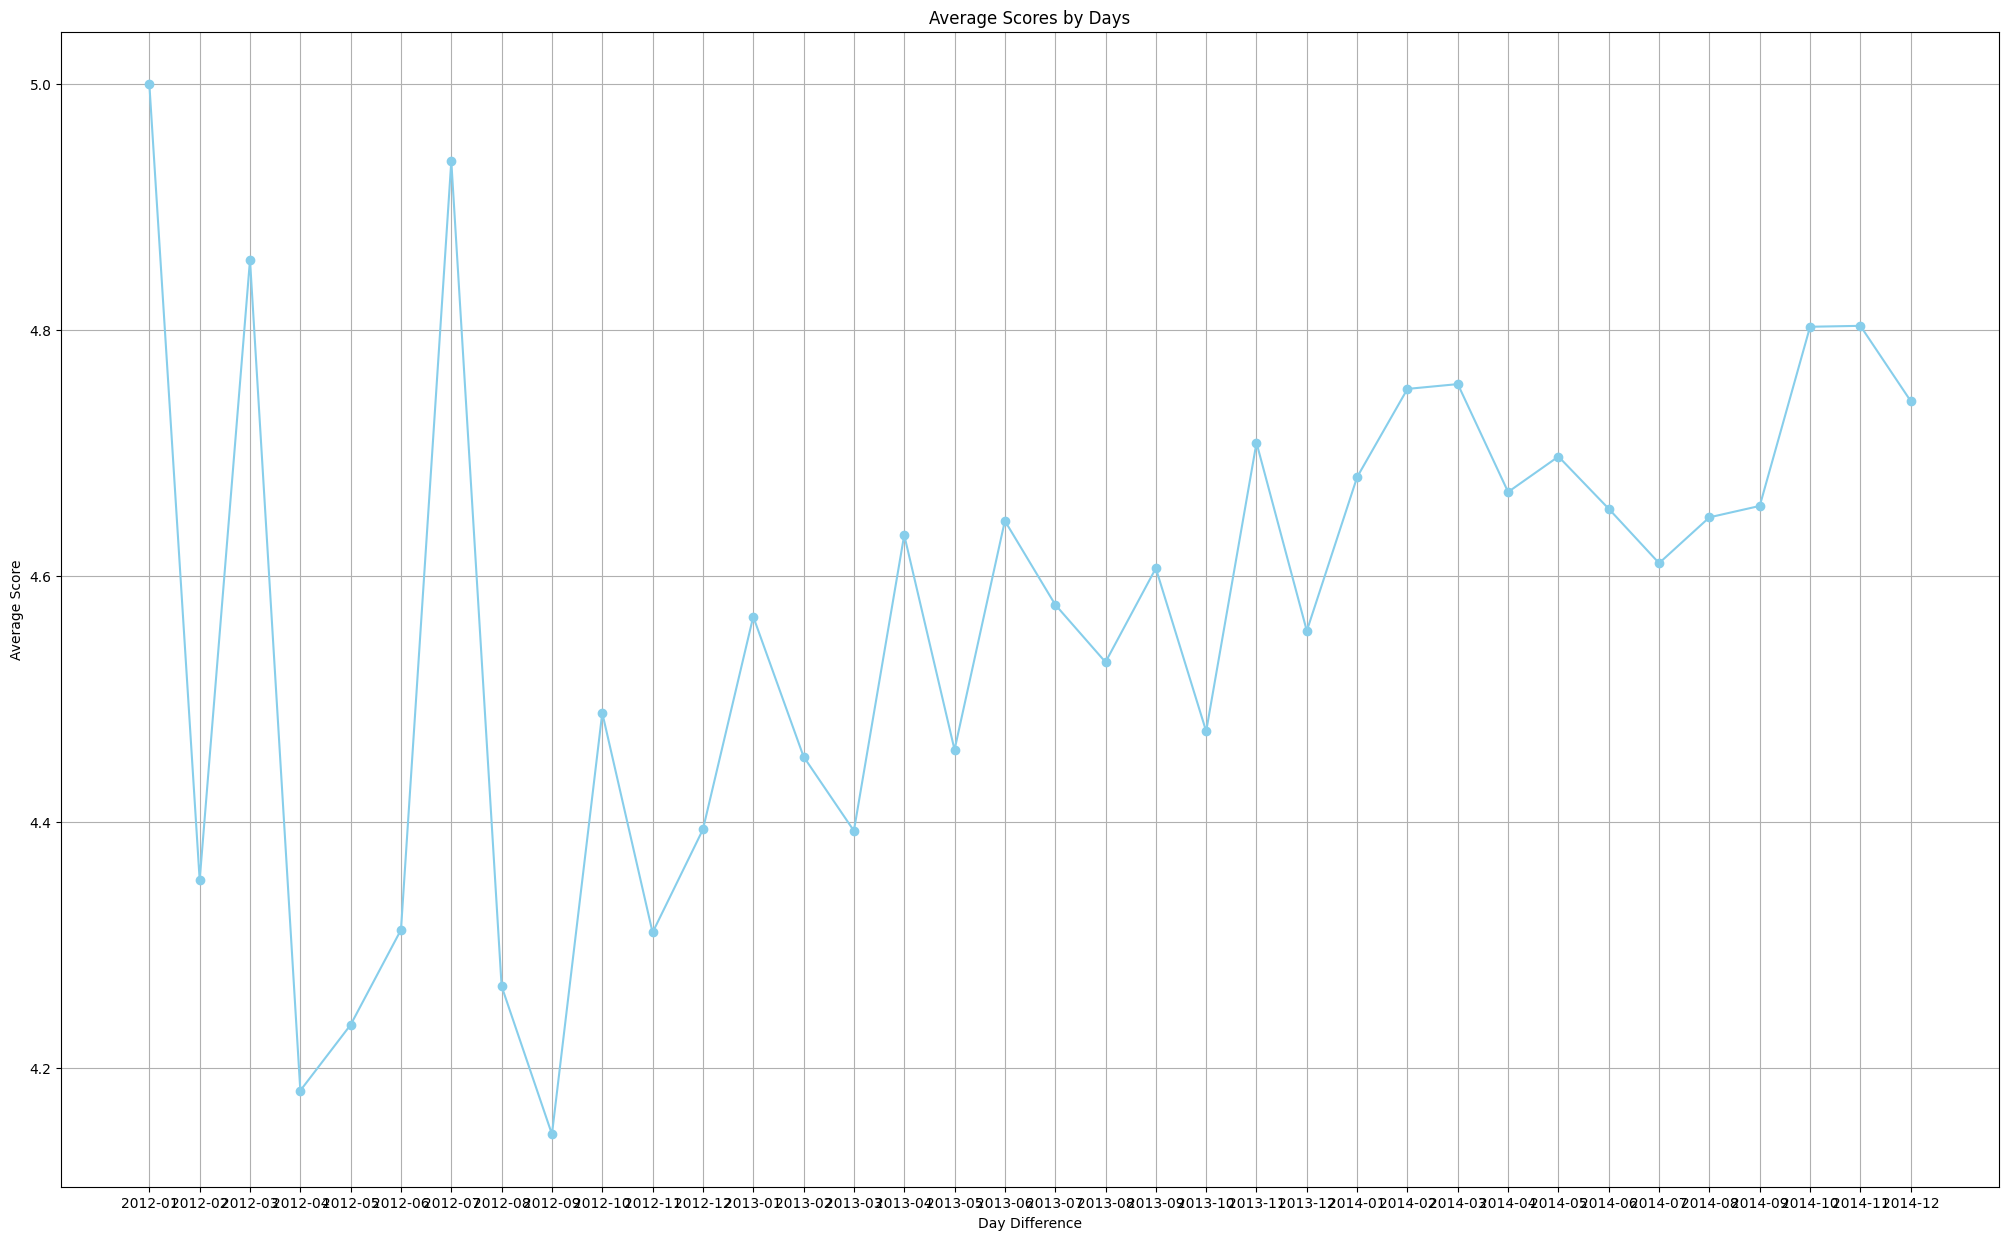

In [3]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])
df["reviewTime"] = df["reviewTime"].dt.strftime('%Y-%m')

# Utilize your data to group and calculate average scores.
grouped_data = df.groupby("reviewTime").agg({"overall": "mean"})

# Create a line chart for visualisation
plt.figure(figsize=(25, 15))
plt.plot(grouped_data.index, grouped_data["overall"], marker='o', color='skyblue', linestyle='-')

# Chart title and axis labels
plt.title('Average Scores by Days')
plt.xlabel('Day Difference')
plt.ylabel('Average Score')

# Graphical representation
plt.grid(True)
plt.show()

Upon analysis of the graph, it is evident that there are seasonal patterns and trends in scoring habits. These changes may be attributed to various factors, such as faulty products sold by manufacturers, issues in the product supply chain process, elimination of product defects, or positive developments. The observed changes in normal scoring habits were a crucial factor in determining the time intervals. To achieve this, the time was divided into four parts based on the graph and distributed with increasing weight towards the nearest time.

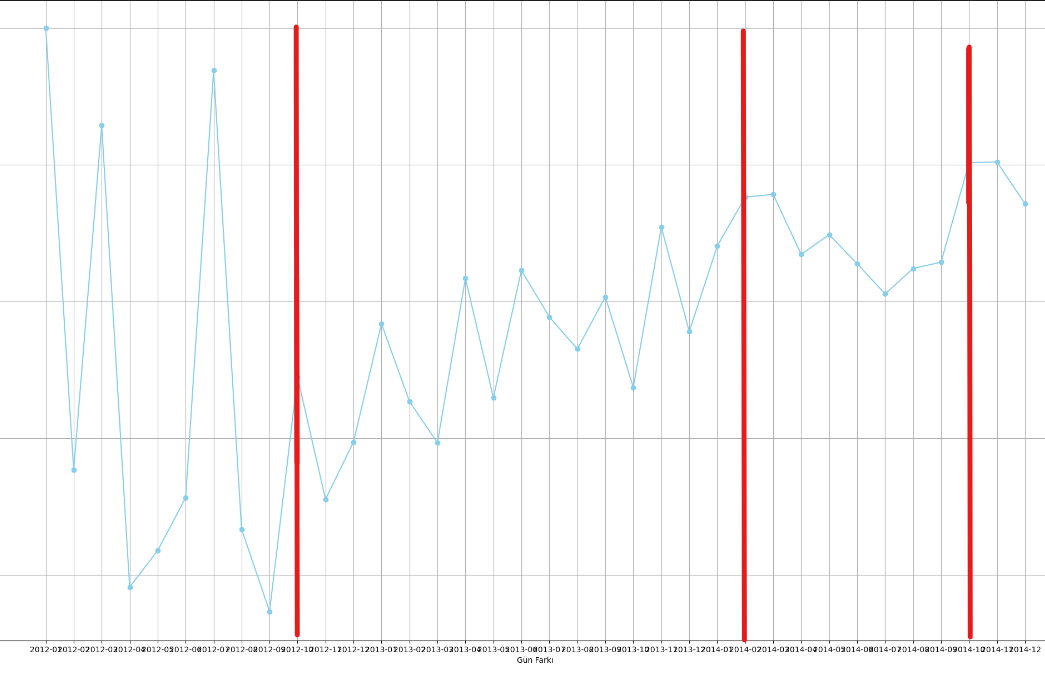

In [4]:
def time_based_weighted_average(df, w1=32, w2=26, w3=22, w4=20):
    return df.loc[df["day_diff"] <= 90, "overall"].mean() * w1 / 100 + \
        df.loc[(df["day_diff"] > 90) & (df["day_diff"] <= 330), "overall"].mean() * w2 / 100 + \
        df.loc[(df["day_diff"] > 330) & (df["day_diff"] <= 810), "overall"].mean() * w3 / 100 + \
        df.loc[(df["day_diff"] > 810), "overall"].mean() * w4 / 100

time_based_weighted_average(df)

4.638496684211441

The Average Rating of the product is 4.587589013224822 but Time-Based Weighted Average Rating of the product is 4.638496684211441

# Determine the 20 Review to be displayed on the Product Detail Page for the product.

* The use of the Wilson Lower Bound (WLB) to sort reviews takes into account the uncertainty caused by the number of votes, resulting in fairer rankings. Unlike subtracting votes or using ratios, the WLB provides a statistically robust estimate of the true rating. For example, a review with 80% positive votes from 100 people would be ranked higher than one with 90% positive votes from 10 people, as the former has a greater level of certainty in its rating.  This approach prevents biased rankings, particularly for reviews with fewer votes, providing a more precise representation of user satisfaction in recommendation systems.

* The scores obtained by subtracting votes and using ratios will be added to their respective columns. To compare these scores with the Wilson lower bound, observe the differences.

In [5]:
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]
def score_up_down_diff(up, down):
    return up - down


def score_average_rating(up, down):
    if up + down == 0:
        return 0
    else:
        return up / (up + down)


def wilson_lower_bound(up, down, confidence=0.95):
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)


df["score_pos_neg_diff"] = df.apply(lambda x: score_up_down_diff(x["helpful_yes"], x["helpful_no"]), axis=1)

# score_average_rating
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"], x["helpful_no"]), axis=1)

# wilson_lower_bound
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)

# Sort Reviews By Subtraction of Positive and Negative Scores

In [6]:
top_comments_pos_neg_diff = df.sort_values("score_pos_neg_diff", ascending=False)
top_comments_pos_neg_diff[["reviewerID","summary","overall","helpful_yes","helpful_no", "score_pos_neg_diff", "score_average_rating", "wilson_lower_bound"]].head(20)

,reviewerID,summary,overall,helpful_yes,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,5.00000,1952,68,1884,0.96634,0.95754
4212,AVBMZZAFEKO58,1 Star reviews - Micro SDXC card unmounts itse...,1.00000,1568,126,1442,0.92562,0.91214
3449,AOEAD7DPLZE53,Top of the class among all (budget-priced) mic...,5.00000,1428,77,1351,0.94884,0.93652
317,A1ZQAQFYSXL5MQ,"Warning, read this!",1.00000,422,73,349,0.85253,0.81858
3981,A1K91XXQ6ZEBQR,"Resolving confusion between ""Mobile Ultra"" and...",5.00000,112,27,85,0.80576,0.73214
4596,A1WTQUOQ4WG9AI,Designed incompatibility/Don't support SanDisk,1.00000,82,27,55,0.75229,0.66359
1835,A1J6VSUM80UAF8,I own it,5.00000,60,8,52,0.88235,0.78465
4672,A2DKQQIZ793AV5,Super high capacity!!! Excellent price (on Am...,5.00000,45,4,41,0.91837,0.80811
4306,AOHXKM5URSKAB,Awesome Card!,5.00000,51,14,37,0.78462,0.67033
315,A2J26NNQX6WKAU,Samsung Galaxy Tab2 works with this card if re...,5.00000,38,10,28,0.79167,0.65741


# Sort Reviews By Average Rating

In [7]:
top_comments_average_rating = df.sort_values("score_average_rating", ascending=False)
top_comments_average_rating[["reviewerID","summary","overall","helpful_yes","helpful_no", "score_pos_neg_diff", "score_average_rating", "wilson_lower_bound"]].head(20)

,reviewerID,summary,overall,helpful_yes,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4277,A35KXSU6AD1481,Perfect!!,5.00000,1,0,1,1.00000,0.20655
2881,A3VSG5X7GPNNW6,Nexus One Loves This Card!,5.00000,1,0,1,1.00000,0.20655
1073,A2ZXEKQ2OBZLEE,Tons of space for phone,5.00000,1,0,1,1.00000,0.20655
445,AIWBDRNBODLEA,Amazon Great Prices,4.00000,1,0,1,1.00000,0.20655
3923,A2PH4RGYVR34L,What more to say?,5.00000,1,0,1,1.00000,0.20655
435,AUH8I22ITG020,Love the extra storage,5.00000,1,0,1,1.00000,0.20655
2901,A28TRYU3FJ039C,Awesome and fast card :),5.00000,1,0,1,1.00000,0.20655
2204,AANX2UN8NPE22,Sandisk will replace failures due to bad batch...,2.00000,1,0,1,1.00000,0.20655
2206,A3KO3964CNP0XN,Great card,5.00000,1,0,1,1.00000,0.20655
3408,A20WUUD9EDWY4N,working no problem,5.00000,1,0,1,1.00000,0.20655


# Sort Reviews By Wilson Lower Bound

In [8]:
top_comments = df.sort_values("wilson_lower_bound", ascending=False)
top_comments[["reviewerID","summary","overall","helpful_yes","helpful_no", "score_pos_neg_diff", "score_average_rating", "wilson_lower_bound"]].head(20)

,reviewerID,summary,overall,helpful_yes,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,5.00000,1952,68,1884,0.96634,0.95754
3449,AOEAD7DPLZE53,Top of the class among all (budget-priced) mic...,5.00000,1428,77,1351,0.94884,0.93652
4212,AVBMZZAFEKO58,1 Star reviews - Micro SDXC card unmounts itse...,1.00000,1568,126,1442,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,"Warning, read this!",1.00000,422,73,349,0.85253,0.81858
4672,A2DKQQIZ793AV5,Super high capacity!!! Excellent price (on Am...,5.00000,45,4,41,0.91837,0.80811
1835,A1J6VSUM80UAF8,I own it,5.00000,60,8,52,0.88235,0.78465
3981,A1K91XXQ6ZEBQR,"Resolving confusion between ""Mobile Ultra"" and...",5.00000,112,27,85,0.80576,0.73214
3807,AFGRMORWY2QNX,"Good buy for the money but wait, I had an issue!",3.00000,22,3,19,0.88000,0.70044
4306,AOHXKM5URSKAB,Awesome Card!,5.00000,51,14,37,0.78462,0.67033
4596,A1WTQUOQ4WG9AI,Designed incompatibility/Don't support SanDisk,1.00000,82,27,55,0.75229,0.66359
